# Lecture 7 — Classical/Frequentist Statistical Inference: III

[Open this notebook in Google Colab](https://colab.research.google.com/github/daanmeerburg/Statistics_meerburg_2026//blob/main/Lectures/Lecture_07_PDM.ipynb)


**Lecturer:** P. D. Meerburg 

*Heavily based on materials by Davide Gerosa (astroML, 2022) and collaborators. See [here](https://github.com/dgerosa/astrostatistics_bicocca_2023/blob/main/README.md) for credits.*

##### Reading:

- [Ivezic textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy) Chapter 4. 
- [David Hogg's "Fitting A Model To Data"](https://arxiv.org/abs/1008.4686)

---

>## Hypothesis Testing <a class="anchor" id="one"></a>

A central problem in statistics is **hypothesis testing**: deciding whether an observation, or a dataset, is consistent with a specified model.

In hypothesis testing, we begin by formulating a **null hypothesis**, usually denoted $H_0$.  The null hypothesis represents a default or baseline explanation of the data.

We then ask whether the observed data are sufficiently incompatible with $H_0$ that we are justified in **rejecting** it.

---

### A simple example

Suppose we measure a value $x_i$, or a collection of values $\{x_i\}$, and assume that they were drawn from a Gaussian distribution,

$$
x \sim \mathcal{N}(\mu, \sigma).
$$

In this case:
- the Gaussian model $\mathcal{N}(\mu, \sigma)$ is the **null hypothesis**,
- we compute how likely our data are under this model,
- if the probability is sufficiently small, we may reject $H_0$.

Importantly, **rejecting the null hypothesis does not automatically mean that a specific alternative model is correct**.  It only means that the null model is unlikely to have generated the observed data.

---

### Example: signal detection in noisy data

A classic example of hypothesis testing appears in **signal detection** problems.

In astronomy, this occurs when searching for sources in images affected by substantial noise (e.g., atmospheric fluctuations or detector noise).  In particle physics and cosmology, the same statistical structure appears when searching for:
- excess events over a smooth background,
- localized peaks in invariant-mass spectra,
- or weak signals embedded in instrumental noise.

In all of these cases:
- the **null hypothesis** is that the observed data are produced entirely by background processes,
- the background fluctuates randomly,
- and apparent “signals” may arise purely from chance fluctuations.

To claim a detection, the observed signal must be sufficiently unlikely under the background-only hypothesis.

---

### Important conceptual point

Rejecting the null hypothesis does **not** mean that the signal model is automatically correct.

Possible alternatives include:
- an incomplete or incorrect background model,
- unaccounted-for systematics,
- detector effects,
- or mismodeling of noise properties.

Hypothesis testing therefore answers a very specific question:

> *Are the data compatible with the null hypothesis?*

It does **not** answer the question:

> *Which model is true?*

---

### Source detection in images

In the image below (from the [`photutils`](https://photutils.readthedocs.io/en/stable/background.html) package), artificial sources are embedded in Gaussian image noise.

- Each pixel value fluctuates due to background noise.
- The null hypothesis is that all pixel values arise from background fluctuations alone.
- A source is considered detected if we can reject the background-only hypothesis with high confidence.

In practice, we define a **detection threshold**:
- values above the threshold are accepted as candidate sources,
- values below are treated as consistent with background.

This inevitably leads to trade-offs:
- some real sources may be missed (*false negatives*),
- some noise fluctuations may be incorrectly accepted (*false positives*).

Managing this balance is a central theme of hypothesis testing.

![simulated photometry data](AstroData.png)


>## Assignment
### Particle-physics analogue

In particle physics, hypothesis testing is most commonly used to search for
signals embedded in large backgrounds, for example in invariant-mass spectra.

Instead of images and pixels, the data consist of:
- event counts,
- reconstructed energies or masses,
- or other kinematic observables.

The statistical structure is the same:
- the null hypothesis is a background-only model,
- fluctuations in the background can mimic a signal,
- a detection requires rejecting the background hypothesis with high confidence.

Professional particle-physics analyses typically use likelihood-based tools such as RooFit, RooStats, or modern Python frameworks like `pyhf`. We might play with these packages later in the course (group assignment). We just saw an example of the challenge of a background when trying to fit a bunch of Gaussians in the previous lecture.


The same applies to time series data. This is a famous plot from gravitational-wave astronomy (namely the very first event detected in 2015). These data have already been filtered, but one can clearly see some noise and then a signal popping out of it. Now, what's its significance? 
    
![](https://gwpy.github.io/docs/1.0.0/_images/gw150914-8.png)

Imagine we have data $\{x_i\}$. This could be signal strength in time-domain data, or pixel brightness in image data. Under an assumption about the null background distribution, $h_0(x)$, we can compute the probability that a data point would have a value as large or greater than that observed. This is called the ***$p$-value*** of the data:

$$ p_i = \int_{x_i}^\infty h_0(x)dx \equiv 1 - \int_{-\infty}^{x_i} h_0(x)dx = 1-H_0(x_i),$$

where $H_0(x)$ is the CDF (cumulative density function) of the null distribution.

In the image below, we show the distribution of a statistic $S$ under a null hypothesis $\mathcal{H}_\mathrm{null}$. The $p$-value of the observed statistic $S_\mathrm{obs}$ is shown graphically.



Typically, a threshold $p$-value is adopted, called the **significance, $\alpha$**. In a classification scheme, data would then reject the null hypothesis if $p_i\leq\alpha$. If $\alpha=0.05$, such data would reject the null hypothesis at the $0.05$ significance level. 



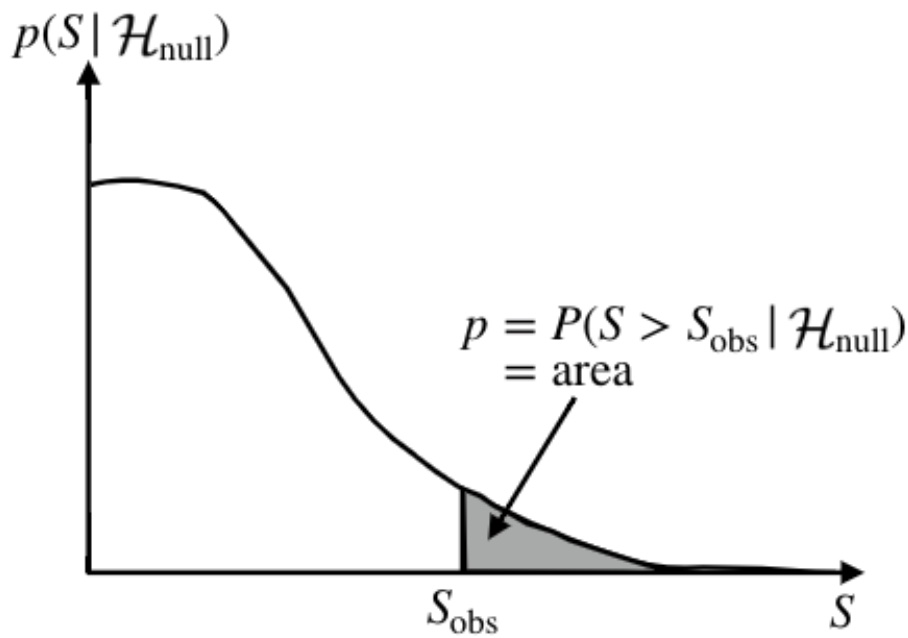


**NOTE**
- If we can't reject the null hypothesis then it doesn't mean the data belongs to the background. It could be that our sample is simply not large enough to detect an effect. 
- As said, rejecting the null hypothesis does not necessarily mean that we've proven a signal hypothesis. Our model of the null hypothesis could be bad, or there could be many other things we have not considered.
- There is ***a ton*** of misuse and abuse of p-values in the scientific literature. Read [this](https://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/) and [this](https://www.wikiwand.com/en/Misuse_of_p-values) in your own time. 

**EXAMPLE**

Let's flip a coin 10 times. 
- Defining HEADS as a success event, use `scipy.stats` to define a binomial distribution over $20$ coin flips, where the intrinsic success probability is $0.5$. 
- Plot the probability mass function (the analog of the probability density function for discrete distributions).
- If we get $14$ HEADS, what is the $p$-value with which we reject the hypothesis that the coin is fair?</font>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

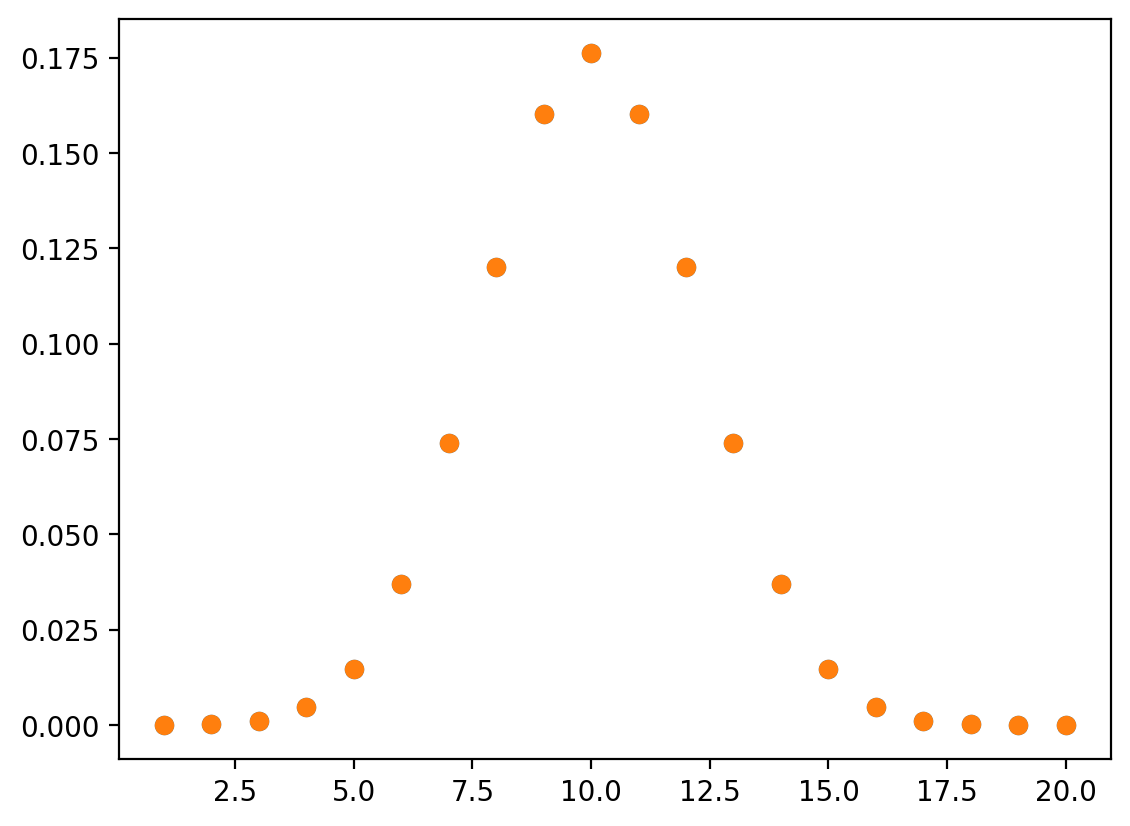

In [3]:
n=20 # number of trials

ks = np.arange(0,n)+1 # possible number of successes
draws=np.array([scipy.stats.binom.pmf(k, n, 0.5) for k in ks]) # probability of each number of successes

plt.scatter(ks,draws)
plt.show()

As expected, having half of the flips be heads has the highest probability (as expected for a discrete prob of 50/50).

In [5]:
# p-value of 6 tails in here.
print(np.sum(draws[ks>=14]))

0.05765914916992186


In 20 flips, we get a result with $p$-value of $1$ in $10^3$ (i.e., $p = 0.001$). How many HEADS did we get?

Let's check the properties of the `scipy.stats.binom` object for useful functions for this.

In [6]:
?scipy.stats.binom

Signature:       scipy.stats.binom(*args, **kwds)
Type:            binom_gen
String form:     <scipy.stats._discrete_distns.binom_gen object at 0x11190a660>
File:            /opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A binomial discrete random variable.

As an instance of the `rv_discrete` class, `binom` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(n, p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, n, p, loc=0)
    Probability mass function.
logpmf(k, n, p, loc=0)
    Log of the probability mass function.
cdf(k, n, p, loc=0)
    Cumulative distribution function.
logcdf(k, n, p, loc=0)
    Log of the cumulative distribution function.
sf(k, n, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, n, p, loc=0)
    Log of the surviva

In [7]:
print(scipy.stats.binom.isf(1e-3, 20, 0.5))

17.0


So the answer is 17 heads. 

When making these kinds of classification decisions, we make two types of errors. These are quite literally described as **Type I** and **Type II** errors by *Neyman & Pearson*.

**TYPE I ERRORS**

- The null hypothesis is true, but incorrectly rejected.
- These are ***false positives*** (or false alarms).
- False positive probability is dictated by the significance level $\alpha$. 

Aka *That pixel was just background, but I think it's a real source.*

**TYPE II ERRORS**

- The null hypothesis is false, but not rejected.
- These are ***false negatives*** (or false dismissals).
- False negatives probability is dictated by a variable called $\beta$, related to $(1-\beta)$, called the ***detection probability***.

Aka *That was a real image, but I missed it!*


Let's take a look at Fig 4.5 of Ivezic, v2. We have two Gaussian distributions; one describing the background noise and one describing the source. These distributions overlap, as they often do in real life. Note that we could also have something similar in particle detectors, or e.g. when measuring SZ clusters in CMB maps (and you are looking for a cluster, but seeing a star instead). 


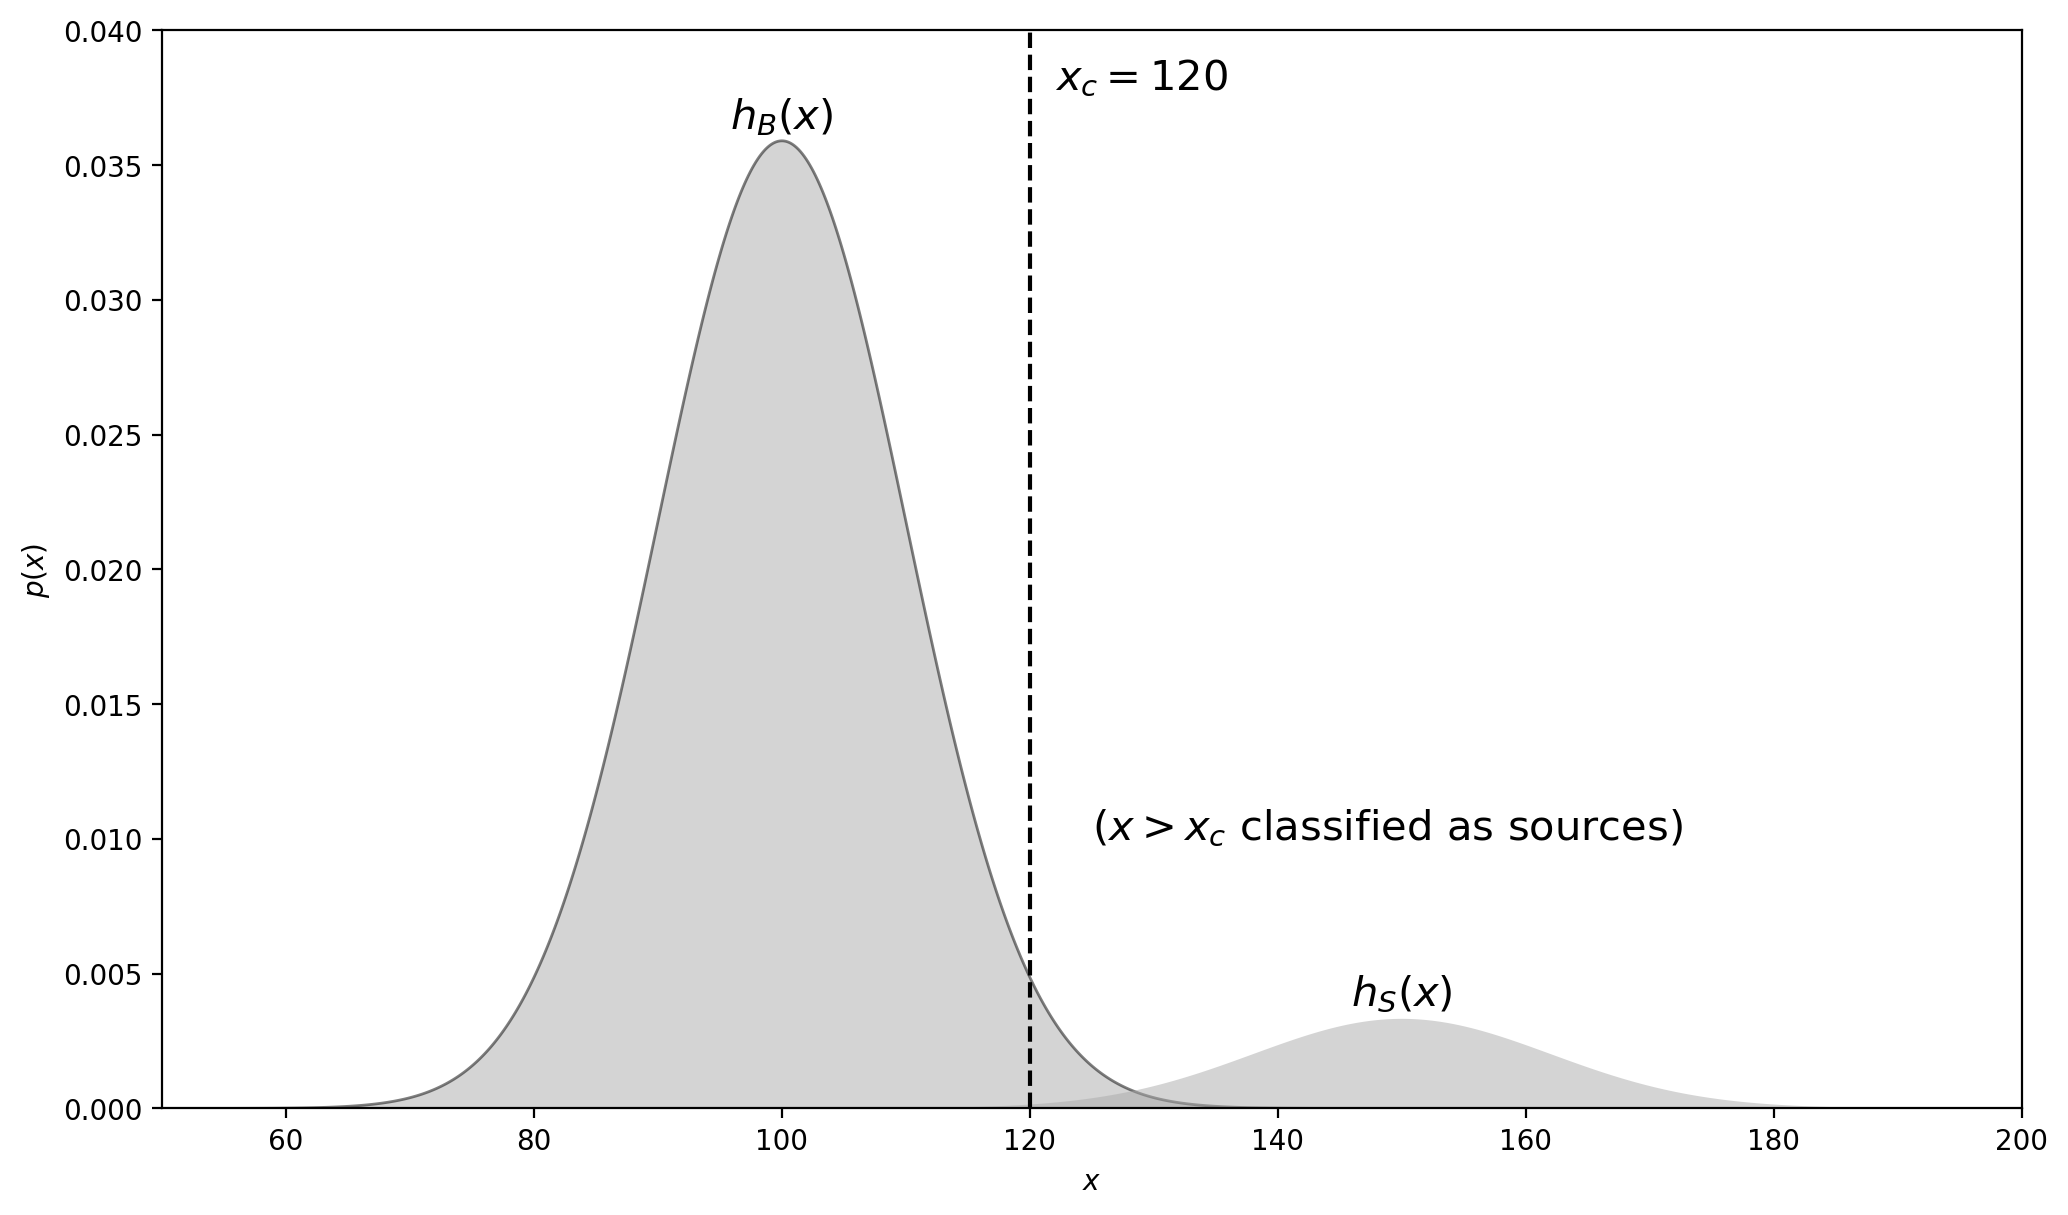

In [4]:
# %load ./code/fig_classification_example.py
"""
Example of classification
-------------------------
Figure 4.5.

An example of a simple classification problem between two Gaussian
distributions. Given a value of x, we need to assign that measurement to one
of the two distributions (background vs. source). The cut at xc = 120 leads
to very few Type II errors (i.e., false negatives: points from the distribution
hS with x < xc being classified as background), but this comes at the cost of
a significant number of Type I errors (i.e., false positives: points from the
distribution :math:`h_B` with x > xc being classified as sources).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

#------------------------------------------------------------
# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

fig, ax = plt.subplots(figsize=(12, 7))
ax.fill(x, p1, ec='k', 
        fc='#AAAAAA', alpha=0.5)
ax.fill(x, p2, '-k', 
        fc='#AAAAAA', alpha=0.5)

ax.plot([120, 120], 
        [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', 
        va='bottom', fontsize=15)
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', 
        va='bottom', fontsize=15)
ax.text(122, 0.039, r'$x_c=120$', ha='left', 
        va='top', fontsize=15)
ax.text(125, 0.01, 
        r'$(x > x_c\ {\rm classified\ as\ sources})$', 
        fontsize=15)

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

In this example, we have data $\{x_i\}$ drawn from an underlying distribution

$$ h(x) = (1-a)h_B(x) + ah_S(x)$$

where $h_B(x)=\mathcal{N}(\mu=100,\sigma=10)$ is the background distribution (normalized to unity), $h_S(x)=\mathcal{N}(\mu=150,\sigma=12)$ is the source distribution (normalized to unity), and $a$ is the relative normalization factor that accounts for background noise being $(1-a)/a$ more probable than sources.

- ***If we set a classificiation threshold at $x_c=120$, calculate the Type I error (false positive) probability, $\alpha$.***
- ***For the same $x_c$, calculate the Type II error (false negative) probability, $\beta$.***

For a sample of size $N$ (containing background noise and sources), the **expected number of spurious sources (Type I / false positives)** is 

$$ n_\mathrm{spurious} = N(1-a)\alpha = N(1-a)\int_{x_c}^\infty h_B(x)dx.$$

This number tells us how much background and the sources have overlapping probabilty, given the threshold. Hence this would provide a possibility of falsely identifying a background sample with a source.  

The **expected number of missed sources (Type II / false negatives)** is

$$ n_\mathrm{missed} = Na\beta = Na\int_0^{x_c}h_S(x)dx.$$

This is similar logic. Below the threshold, we still have finite probability of finding a real source. But this we will now miss, since we put in a threshold. 

The **total number of classified sources** (that is, the number of instances where we reject the null hypothesis) is

$$ n_\mathrm{source} = Na - n_\mathrm{missed} + n_\mathrm{spurious} = N[(1-\beta)a + (1-a)\alpha].$$

The **sample completeness** (or **detection probability**) is defined as

$$ \eta = \frac{Na - n_\mathrm{missed}}{Na} = 1-\int_0^{x_c}h_S(x)dx = 1-\beta$$

Finally, the **sample contamination** is

$$ \epsilon = \frac{n_\mathrm{spurious}}{n_\mathrm{source}}$$

where $(1-\epsilon)$ is sometimes called the **classification efficiency**.

In [5]:
xc=120
# Compute false positive 
alpha = np.trapezoid(p1[x>xc], dx=x[1]-x[0])
print('false positive', alpha)
# Compute false negative rate
beta = np.trapezoid( p2[x<xc], dx=x[1]-x[0])

print('false negative', beta)
print('completeness', 1-beta)
a=0.1
print('contamination', (1-a)*alpha/( ( 1-beta)*a +(1-a)*alpha) )

false positive 0.019900194921703387
false negative 0.0006166506405920415
completeness 0.999383349359408
contamination 0.15197625641588255


In [6]:
np.trapezoid(p1, dx=x[1]-x[0])/0.9
np.trapezoid(p2, dx=x[1]-x[0])/0.1

np.float64(0.9999845420195367)

**The threshold depends on what you care about**. 

- Say you're looking for a very rare type of object/event, and you're designing a machine-learning strategy to filter a large number of images/data. Those that are left will need to be analyzed visually (which is painful and time-consuming). In this case, you might be willing to accept some contamination, as long and the filtered sample is very complete (better do a bit more manual work than lose a Nobel-prize-worthy target!)

- Say you're testing a safety protocol for your computer cluster: you don't want it to explode while you run your very complicated particle physics simulations. In this case, the contamination needs to be extremely low, even if then the sample is less complete (i.e. you end up discarding many potential builds that would not blow up your cluster after all, but you're sure that the one you pick is very safe).

>## Comparing Distributions <a class="anchor" id="two"></a>

Hypothesis testing is closely linked to the problem of **comparing distributions**.

Typical questions include:
- Are two datasets consistent with having been drawn from the same underlying distribution?
- Is a dataset consistent with a known reference distribution (e.g. a Gaussian)?
- Do two experiments or detectors measure statistically compatible populations?

These questions arise frequently in cosmology and particle physics.

---

### Examples from physics

**Cosmology.**  
Do two different surveys (or two different analysis pipelines) infer consistent
distributions of galaxy redshifts, shear amplitudes, or CMB temperature fluctuations?

**Particle physics.**  
Are event distributions measured by two detectors (e.g. ATLAS and CMS),
or in two different run periods, statistically compatible?
Are simulated Monte Carlo events consistent with real data in a control region?

**Gravitational-wave physics.**  
Do two detectors with different noise properties measure consistent
distributions of source parameters, such as component masses or spins?

In many cases, we are not testing a specific physical model in detail,
but rather asking a simpler statistical question:
> *Are these two samples plausibly drawn from the same distribution?*

---

### Parametric vs nonparametric approaches

There is a wide range of statistical tests for comparing distributions.

- **Parametric tests** assume a specific functional form (e.g. Gaussian with unknown mean and variance).
- **Nonparametric tests** make minimal assumptions about the shape of the distribution.

Both approaches are widely used.
Modern analyses are often Bayesian and likelihood-based,
but nonparametric tests remain extremely useful for:
- validation,
- sanity checks,
- and exploratory data analysis.

In this lecture, we will focus on a few widely used examples.

---

>## Kolmogorov–Smirnov (KS) test

The most popular nonparametric test for comparing one-dimensional distributions
is the **Kolmogorov–Smirnov (KS) test**.

Suppose we have two samples:
- $\{x_{1,i}\}$ with $i = 1, \ldots, N_1$,
- $\{x_{2,j}\}$ with $j = 1, \ldots, N_2$.

From each sample we compute the **empirical cumulative distribution function (CDF)**,
denoted by $F_1(x)$ and $F_2(x)$.

*Recall:* the empirical CDF is obtained by sorting the data and dividing the rank by the sample size.

---

### KS test statistic

The KS test is based on a single statistic,
defined as the maximum absolute difference between the two empirical CDFs:

$$
D = \max_x \, \left| F_1(x) - F_2(x) \right|,
$$

where $0 \leq D \leq 1$.

Intuitively:
- if the two samples are very similar, their CDFs will track each other closely,
- if they differ, the maximum separation $D$ will be large.

---

### Null hypothesis and $p$-value

The **null hypothesis** of the KS test is:

> *Both samples are drawn from the same underlying distribution.*

The key question is:
> How often would we obtain a value of $D$ at least this large
> purely by chance if the null hypothesis were true?

Remarkably, the answer is known **without specifying the underlying distribution**.

Kolmogorov (1933) and Smirnov (1948) showed that the probability of obtaining
a value of $D$ larger than the observed one is

$$
Q_{\mathrm{KS}}(\lambda)
= 2 \sum_{k=1}^{\infty} (-1)^{k-1} \exp\left(-2 k^2 \lambda^2\right),
$$

where

$$
\lambda = \left(0.12 + \sqrt{n_e} + \frac{0.11}{\sqrt{n_e}} \right) D,
$$

and the **effective number of data points** is

$$
n_e = \left( \frac{1}{N_1} + \frac{1}{N_2} \right)^{-1}
= \frac{N_1 N_2}{N_1 + N_2}.
$$

---

### Interpreting the result

- A **large $p$-value** means the observed difference is consistent with statistical fluctuations.
- A **small $p$-value** means such a difference would be unlikely under the null hypothesis.

If the $p$-value is sufficiently small, we may **reject the null hypothesis**
that the two samples were drawn from the same distribution.

As always, this does *not* tell us why the distributions differ —
only that a statistically significant difference is present only that a statistically significant difference is present.

For large $n_e$ we have $\lambda\approx\sqrt{n_e}D$. In fact, for $n_e>10$ we can bypass $Q_\mathrm{KS}$ entirely and compute the value of D that would correspond to a given significance level $\alpha$,

$$ D_\mathrm{KS} = \frac{C(\alpha)}{\sqrt{n_e}}$$

where $C(\alpha) = \sqrt{-\frac{1}{2}\ln(\alpha/2)}$. Some instructive significance levels are shown below (from [here](https://www.wikiwand.com/en/Kolmogorov%E2%80%93Smirnov_test)).

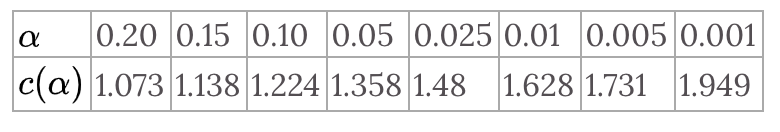

The KS test and variants can be accessed in the `scipy.stats` modules `kstest`, `ks_2samp`, and `ksone.` Let's look at a simple example for comparing a Gaussian sample to a Gaussian null hypothesis distribution. kstest compares one sample against a theoretical distribution and tells us if they match. 

In [7]:
# The kstest function is appropriate for this
x = np.random.normal(loc=0, scale=1, size=100000)
print(stats.kstest(x, 'norm'))

KstestResult(statistic=np.float64(0.0014857650074813211), pvalue=np.float64(0.9798190584461659), statistic_location=np.float64(0.2753185293190459), statistic_sign=np.int8(1))


Let's now compare a Student's $t$ distribution with $100$ degrees of freedom to a Gaussian distribution. 

In [8]:
np.random.seed(42)
print(stats.kstest(stats.t.rvs(df=100, size=100), 'norm'))

KstestResult(statistic=np.float64(0.1094480639463396), pvalue=np.float64(0.1690763484589463), statistic_location=np.float64(-0.3303918854349172), statistic_sign=np.int8(1))


Can I tell if two samples are extracted from the same distribution? So ks_2samp compares two samples (hence 2samp). 

In [10]:
print(stats.ks_2samp(stats.t.rvs(df=100, size=10000), stats.t.rvs(df=100, size=100)))

KstestResult(statistic=np.float64(0.0734), pvalue=np.float64(0.6338420349108864), statistic_location=np.float64(-1.2116726276738679), statistic_sign=np.int8(1))


There are many other nonparametric tests, in particular the **Anderson-Darling test** to check whether a sample is consistent with having been drawn from a Gaussian distribution. We don't have time to do a deep dive here, but see the textbook for further details.

In [11]:
# For example, we can perform an Anderson-Darling test for normality:
x = np.random.normal(loc=0, scale=1, size=1000)
print(stats.anderson(x, 'norm'))
x = np.random.exponential(scale=1, size=1000)
print(stats.anderson(x, 'expon'))
# Or a chi-squared test:
observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])
print(stats.chisquare(observed, expected))
# Or a Shapiro-Wilk test:
x = np.random.normal(loc=0, scale=1, size=100)
print(stats.shapiro(x))
# Or a Jarque-Bera test:
x = np.random.normal(loc=0, scale=1, size=1000)
print(stats.jarque_bera(x))
# Or a D'Agostino's K-squared test:
x = np.random.normal(loc=0, scale=1, size=1000)
print(stats.normaltest(x))
# Or a Cramér-von Mises test:
x = np.random.normal(loc=0, scale=1, size=1000)
print(stats.cramervonmises(x, 'norm'))

AndersonResult(statistic=np.float64(0.24459808103347314), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-0.022171602522625115), scale=np.float64(1.021485225646753))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=np.float64(0.9064997299627748), critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.956]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.0), scale=np.float64(0.9908363843719777))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Power_divergenceResult(statistic=np.float64(5.0), pvalue=np.float64(0.0820849986238988))
ShapiroResult(statistic=np.float64(0.9860732471386335), pvalue=np.float64(0.3783743800468748))
SignificanceResult(statistic=np.float64(1.2269605587643535), pvalue=np.float64(0.541463143059934

>## Nonparametric Modeling & Histograms <a class="anchor" id="three"></a>

Imagine you have some one-dimensional ("univariate") data that you would like to try to understand.  Where by "understand" we mean "know the distribution in the measured space", i.e., you want to know the probability distribution function. Our constant friend is the histogram, and it's usually the first thing any of us do on new data. Simple, right? Not quite...

Let's work through some examples to see what problems we encounter and how we might overcome them.

In [12]:
# Execute this cell to generate a univariate data array, x
# this is the same data used in Ivezic, Figure 6.5

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 1000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

In the next few cells, I plot a normalized histogram of this data with 10 bins, 20 bins, and 100 bins. It starts off looking unimodal and Gaussian-ish, but clearly when more finely binned the data breaks up into several modes.

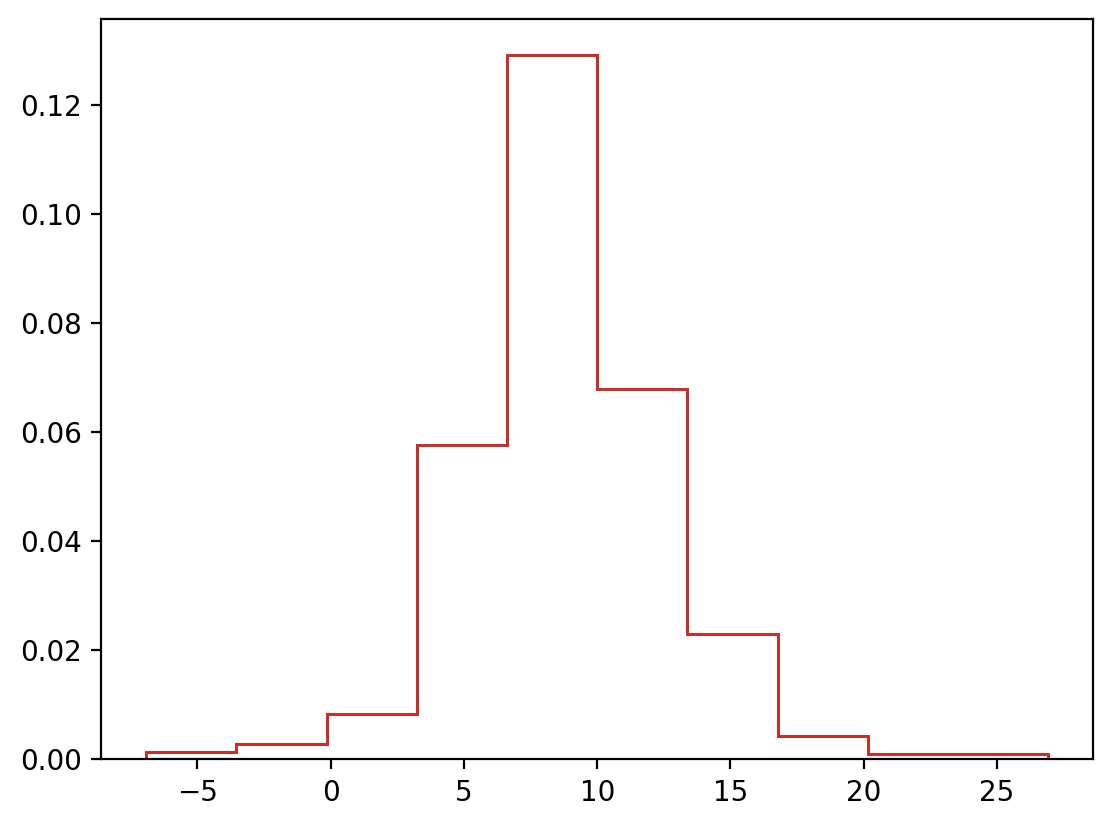

In [17]:
plt.hist(x,bins=10,histtype='step', density=True)
plt.show()

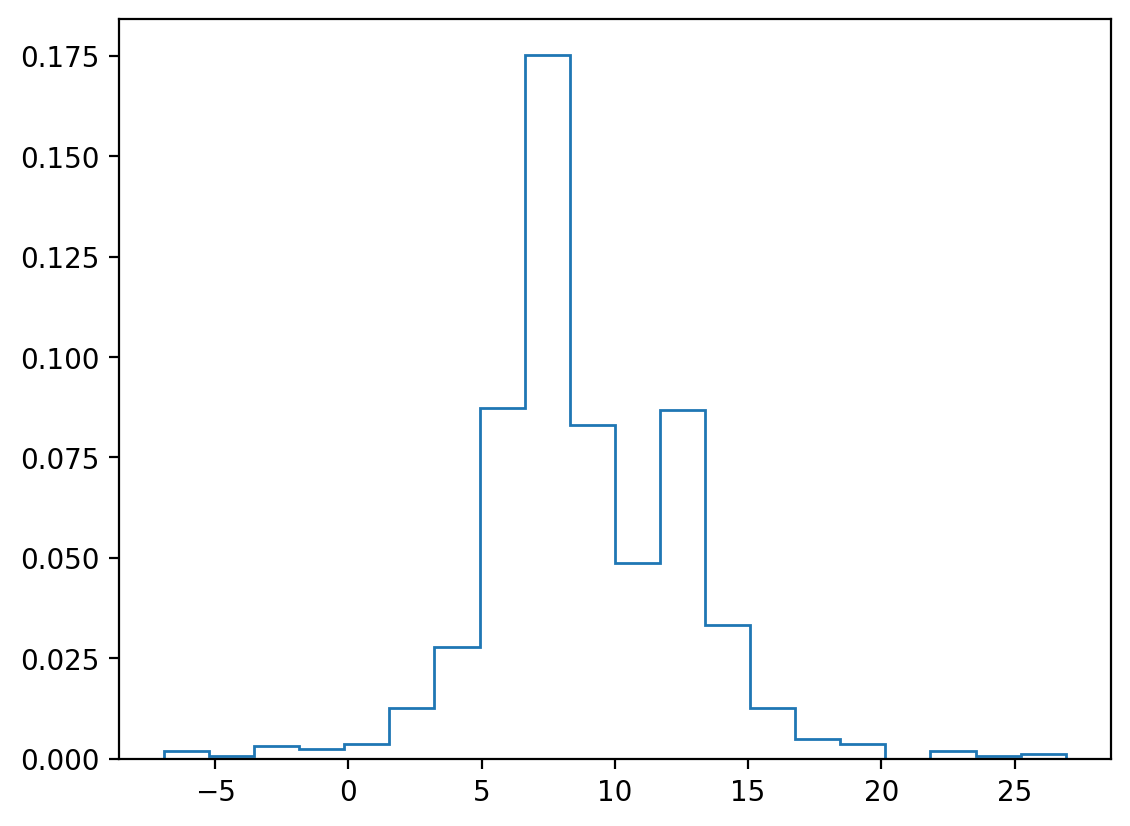

In [18]:
plt.hist(x,bins=20,histtype='step', density=True)
plt.show() 

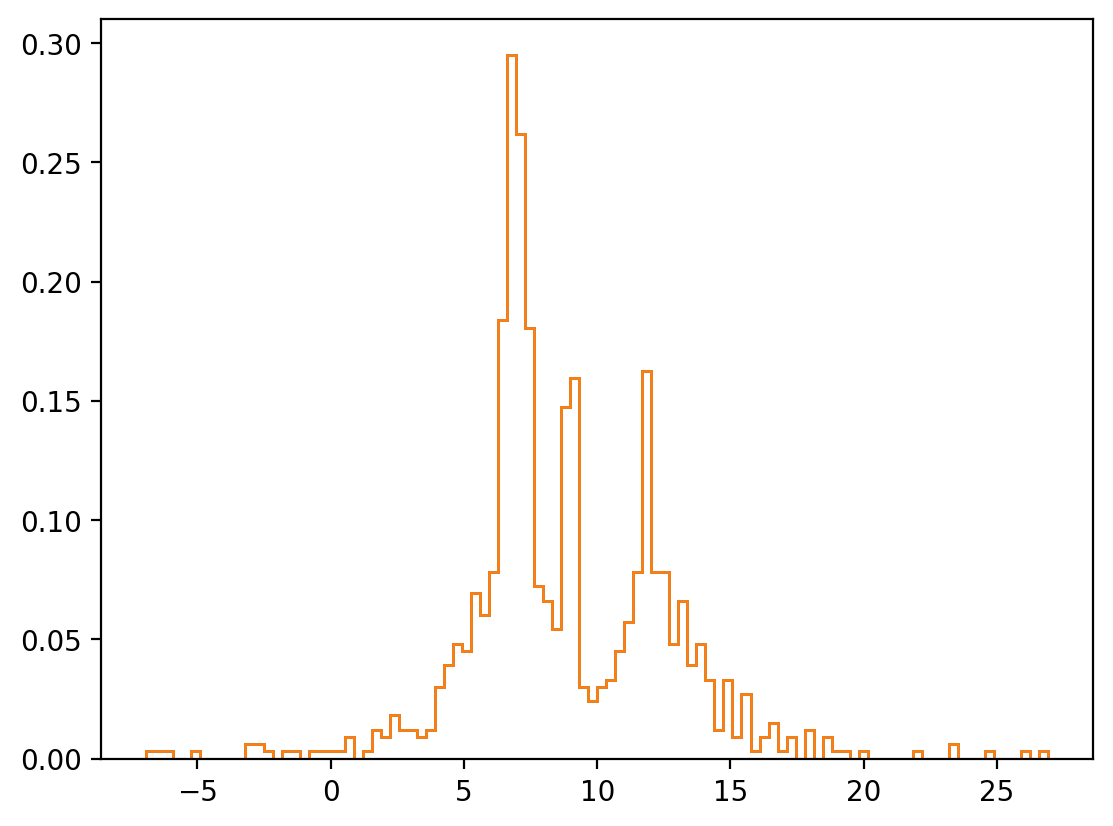

In [20]:
plt.hist(x,bins=100,histtype='step', density=True)
plt.show()

How would you characterize this distribution?  Could we reasonably think of it as a normal (Gaussian) distribution that we could characterize by some mean and standard deviation?  Maybe, but even just by looking at this plot we see that it wouldn't be a particularly good description of the data.

We find that small changes in the (hyper)parameters of the histogram function *significantly* change the PDF.  That's bad, because the underlying data clearly have **not** changed. One of the problems with histograms is that some bins end up with little (or no) data.  We can fix this by making **variable-width bin sizes** that have the ***same number of objects in each bin***.  How can we do this?

In [21]:
# Execute this cell
a = np.linspace(1,42,num=42)
print(a)
print(a[::2])
print(a[::3])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41.]
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]


If you are familiar with slicing, then you know that `[::2]` and `[::3]` say to take every other index of the array or every 3rd index of the array.  So, if your array is sorted (like `a` is), then you could use this to instead define the number of values in a bin.  That is for any given value of `M`

    bins = np.append(np.sort(x)[::M], np.max(x))
    
would give bins with `M` objects in each bin.  

*Note:* you need to add the maximum value to set the right edge of the last bin.  


In [22]:
# Note that x is the data array generated above
bins100 = np.append(np.sort(x)[::100], np.max(x)) # every 100th value
bins30 = np.append(np.sort(x)[::30], np.max(x)) # every 30th value
print(len(bins100),len(bins30)) # number of bins

11 34


In [23]:
# How many elements in each bin?
counts100, b100 = np.histogram(x, bins=bins100)
counts30, b30 = np.histogram(x, bins=bins30)
print(counts100)
print(counts30)


[100 100 100 100 100 100 100 100 100  81]
[30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 21]


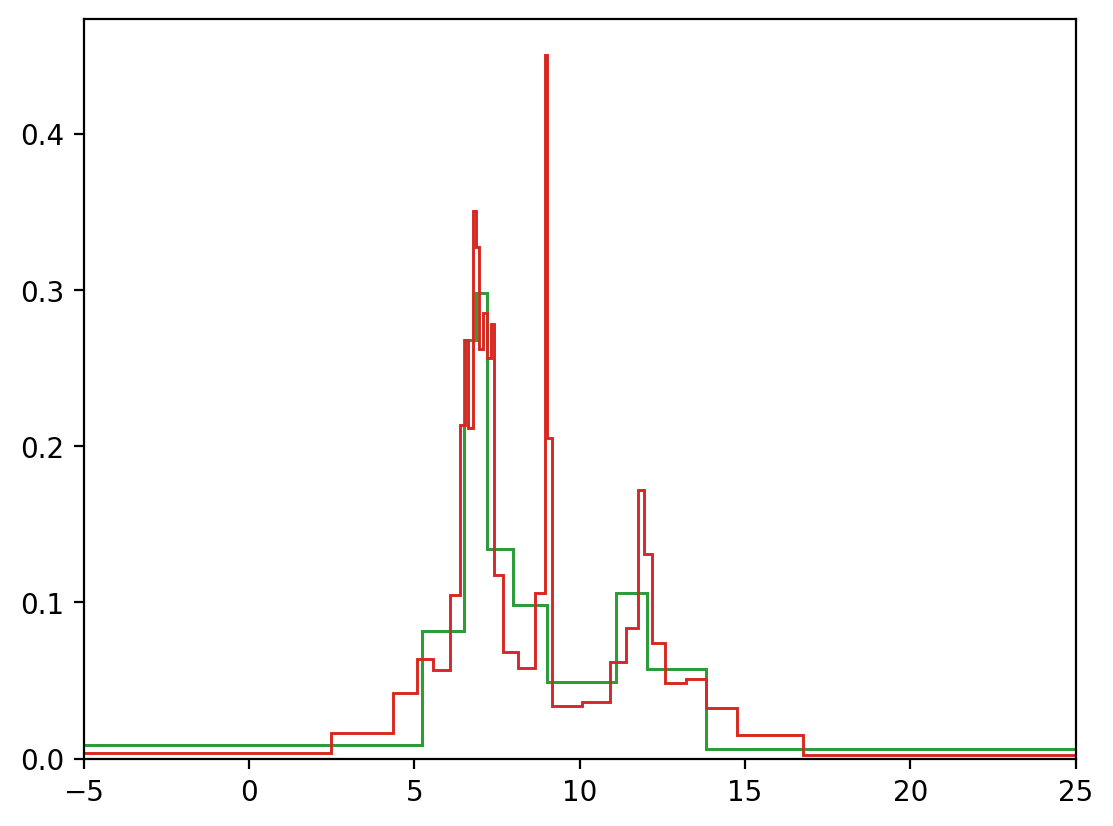

In [25]:
# Note that the underscores and the semicolon at the end both suppress the array output so that we just see the plots
_ = plt.hist(x, bins=bins100, density=True, histtype="step") #Complete
plt.hist(x, bins=bins30, density=True, histtype="step"); #Complete
plt.xlim(-5,25)
plt.show()

Again, this can look pretty different depending on what the number of objects you choose as the minimum for each bin and compared to the plots above.  And it looks a lot different from the plots above.

So, what is the "right" way to set the bin size? There is no "right" way, but there are some useful rules of thumb.

**"Scott's rule"** suggests that the optimal bin width is 

$$\Delta_b = \frac{3.5\sigma}{N^{1/3}}.$$

That's great, but what if we don't know the standard deviation, $\sigma$ (e.g., if the distribution isn't really Gaussian)?  

We can then instead used the **"Freedman-Diaconis rule"**: 

$$\Delta_b = \frac{2(q_{75}-q_{25})}{N^{1/3}} = \frac{2.7\sigma_G}{N^{1/3}}.$$

Let's try that. Remember that you can compute $\sigma_G$ using `astroML`.

In [26]:
from astroML import stats as astroMLstats
sigmaG2 = astroMLstats.sigmaG(x)
print(sigmaG2)

3.6731977984018402


Now set the bin size accordingly, using [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and plot.  Make sure that you don't throw away the last object in data set (append that maximum object to the end)! 

In [28]:
binsize = 2.7*sigmaG2/(N**(1/3)) #compute bin size using Freedman-Diaconis rule
print(binsize) 
binsG = np.append(np.arange(start=x.min(), stop=x.max(), step=binsize) , x.max()) #create bins using this bin size
print(len(binsG))
print(binsG)

0.9917634055684971
36
[-6.92142972e+00 -5.92966631e+00 -4.93790291e+00 -3.94613950e+00
 -2.95437610e+00 -1.96261269e+00 -9.70849286e-01  2.09141194e-02
  1.01267752e+00  2.00444093e+00  2.99620434e+00  3.98796774e+00
  4.97973115e+00  5.97149455e+00  6.96325796e+00  7.95502136e+00
  8.94678477e+00  9.93854818e+00  1.09303116e+01  1.19220750e+01
  1.29138384e+01  1.39056018e+01  1.48973652e+01  1.58891286e+01
  1.68808920e+01  1.78726554e+01  1.88644188e+01  1.98561822e+01
  2.08479456e+01  2.18397090e+01  2.28314724e+01  2.38232359e+01
  2.48149993e+01  2.58067627e+01  2.67985261e+01  2.69181842e+01]


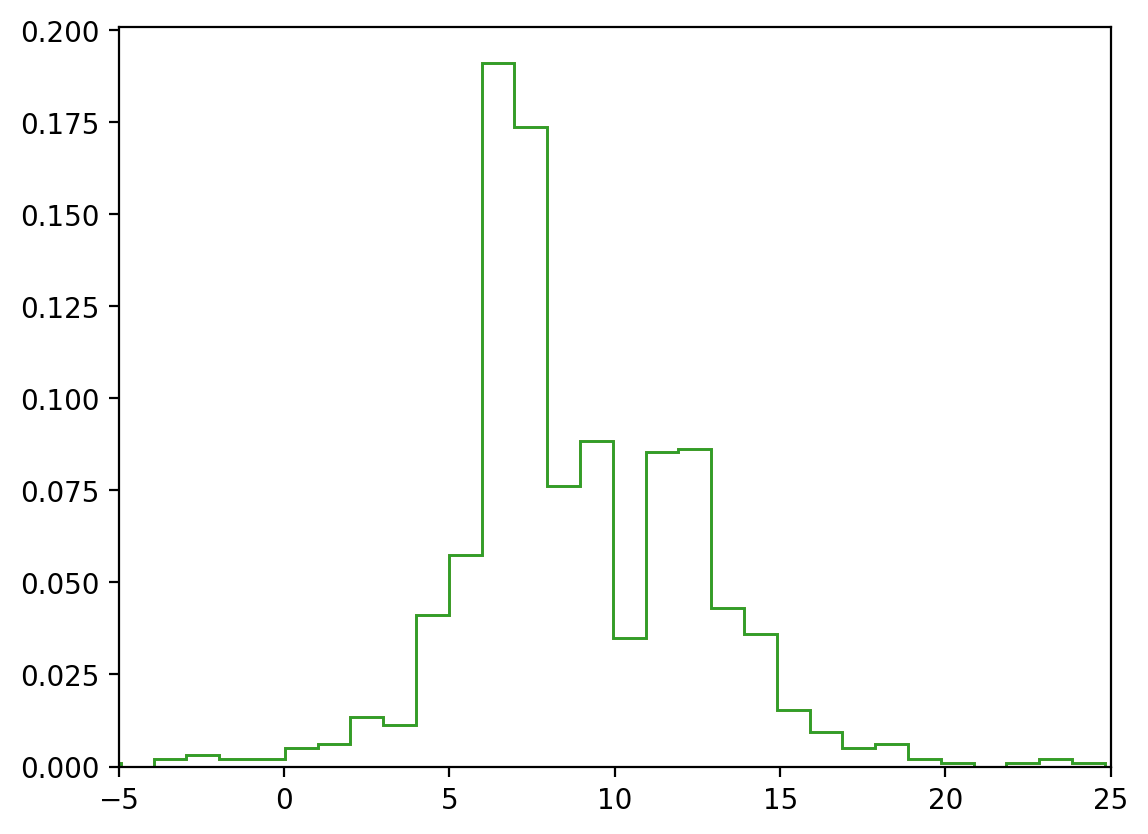

In [31]:
_ = plt.hist(x, bins=binsG, density=True, histtype="step") #Complete
plt.xlim(-5,25)
plt.show()

Did you find that tedious? Me too. Try the following shortcut.

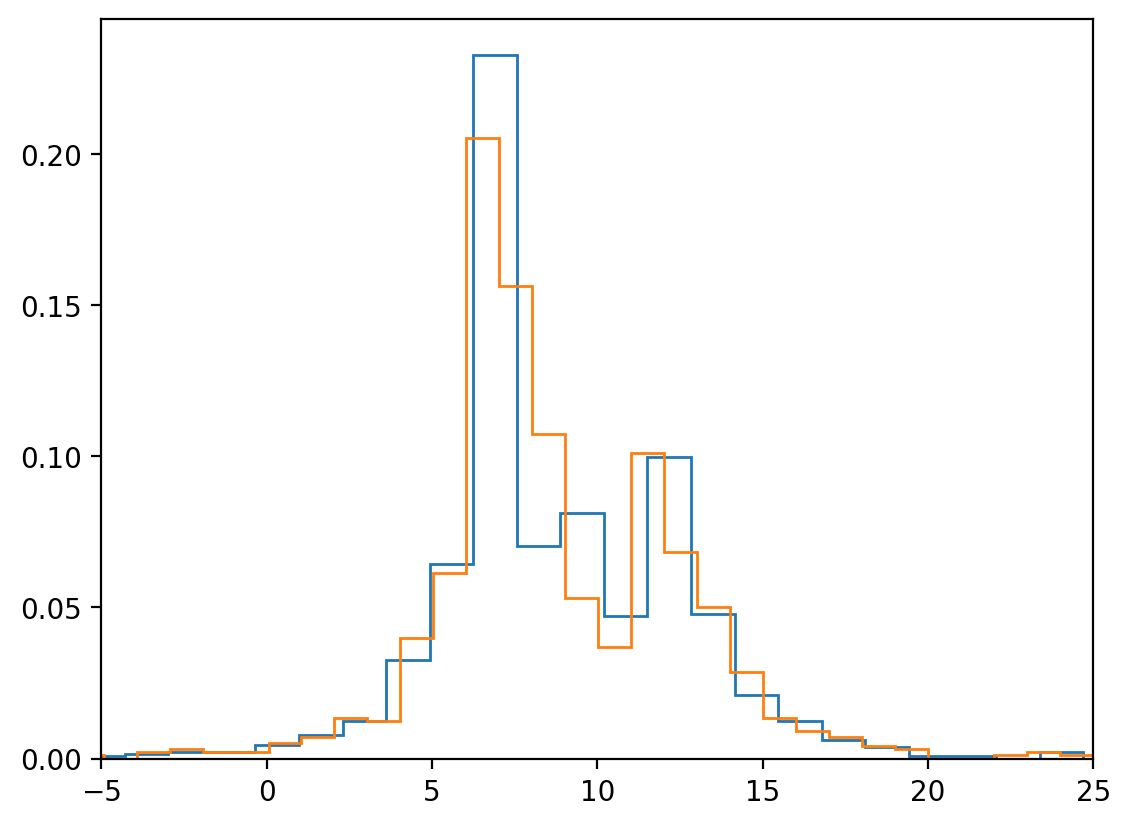

In [32]:
from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(x, bins="scott", histtype="step",density=True) #use Scott's rule in fancyhist
_ = fancyhist(x, bins="freedman", histtype="step",density=True) #use Freedman-Diaconis rule in fancyhist
plt.xlim(-5,25)
plt.show()

Note that even those don't yield quite the same results!  But we can do better!

An obvious thing to do is to simply show all the data.

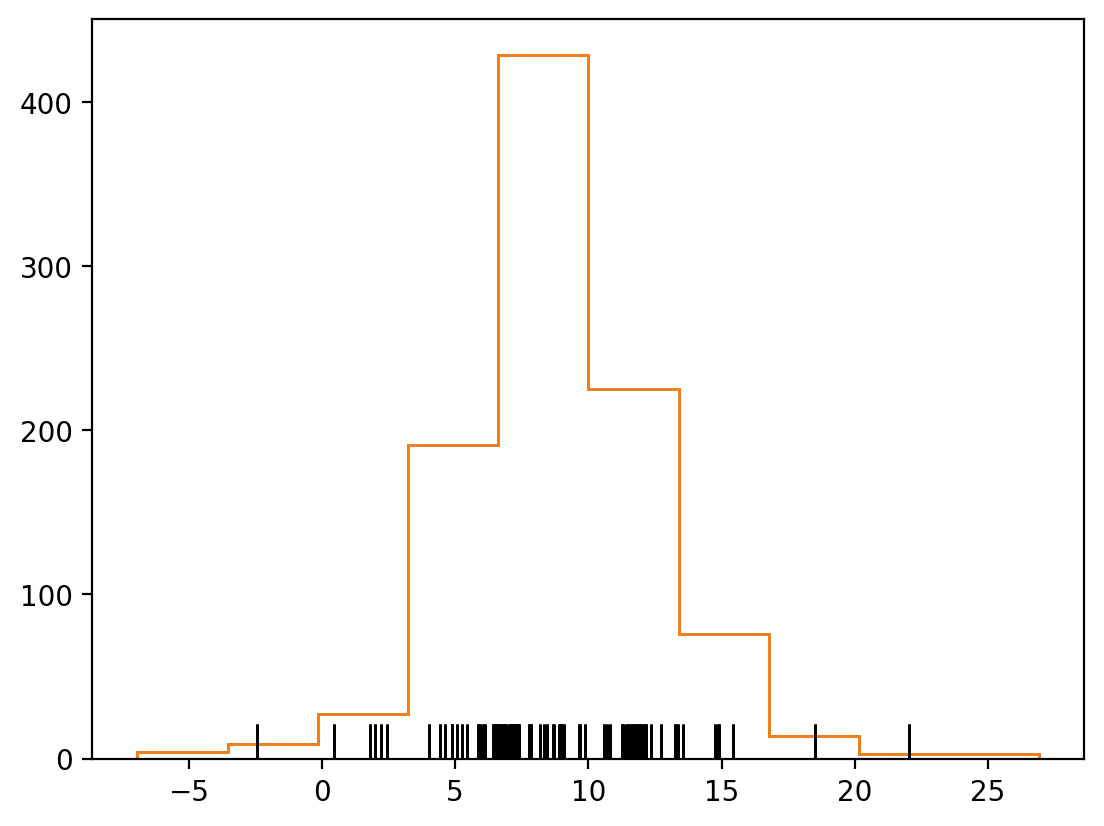

In [34]:
# Execute this cell
plt.hist(x,histtype="step")
plt.plot(x[:100], 0*x[:100], '|', color='k', markersize=25) #Note markersize is (annoyingly) in *points*
plt.show()

This is called a **rug plot** (famously named after our University :p) and now we have a better idea of where most of the data and where the gaps really are (as opposed to where the binning makes them *appear* to be).  However, the markers are all piled up, so we have lost all sense of the relative numbers of objects.  Are there ~10 at x=5 or could there be 100?


>## Kernel Density Estimation (KDE).


This is where **[Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE)** comes in:
- In short the idea here is to represent each data point not as a delta function, but rather as a distribution (e.g., a Gaussian).  
- Those individual distributions ("kernels") are summed up to produce the PDF.  
- One of the advantages of this is that it combines the best of 
    1. the histogram (tells us the relative height of the distribution) 
    2. the rug plot (centers the data points at the actual location of the data instead of within some arbitrary bin)
    

Just about any distribution can be used as the kernel, but the most common are a **Gaussian kernel** and an **Epanechnikov kernel**.  One downside of the Gaussian kernel is that the tails are technically infinite in extent.  So each point has some finite probability of being *everywhere*.  The Epanechnikov kernel has truncated wings.  

One still has the problem of deciding the width of the kernel (e.g., for the Gaussian the "mean" is fixed at the value of the point, but how wide should you make the Gaussian?). For now, we'll just play with the widths by hand to see what might work best.  N.B. the widths of the kernel distribution are referred to as **"bandwidth"**.

In practice, the bandwidth is almost always the key parameter of a KDE representation, the exact shape of the kernel doesn't really matter too much. 

In [35]:
# Load the KDE module
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(x.min(),x.max(),1000)  # Use this instead of 'x' for plotting

# Define a function to do KDE using sklearn
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"): 
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel) # Define the KDE object
    kde_skl.fit(data[:, np.newaxis]) # Fit the KDE model
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

Before we try the Gaussian and Epanechnikov kernels, let's first start with a tophat using `kernel = "tophat"`, which will produce a plot much like the rug plot.

Start with `bandwidth=0.001`.  See what happens when you adjust this.

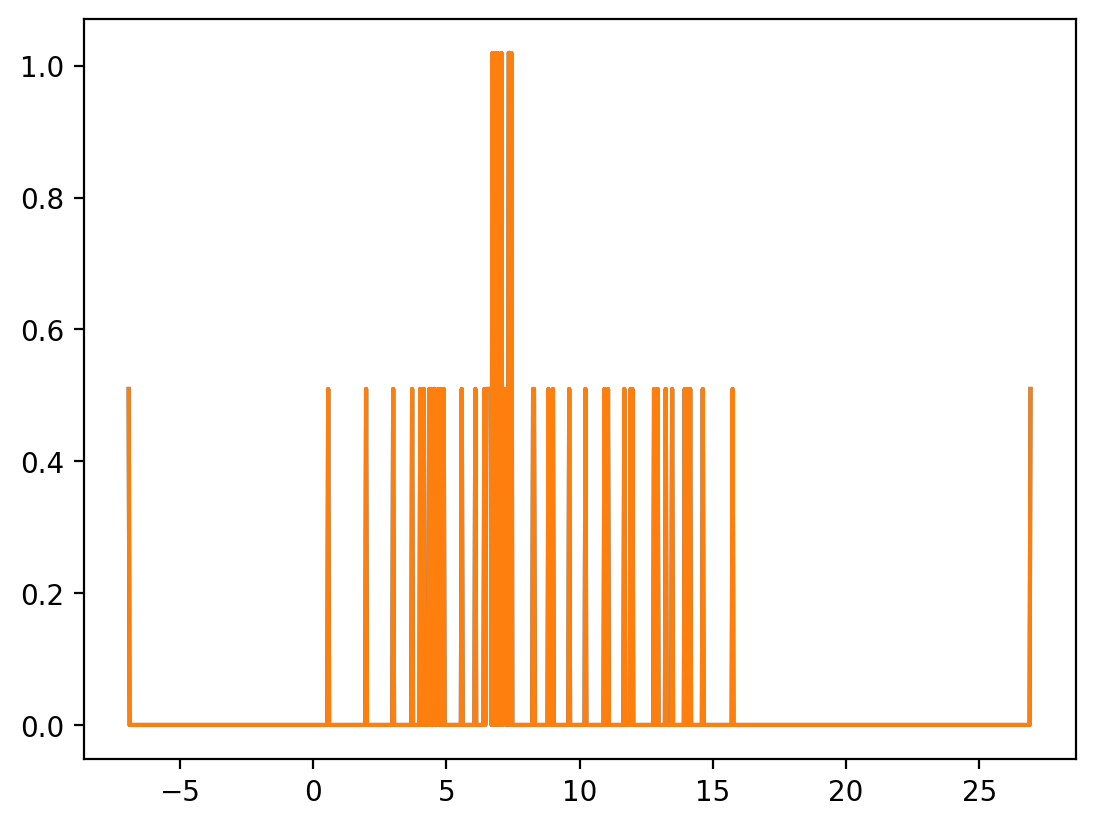

In [37]:
PDFtophat = kde_sklearn(x,bandwidth=0.001,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat); #Complete
plt.show()


The defaults give a result that is essentially what you would get if you made a histogram with a really large number of bins.

Now let's compare what happens when we adjust the bandwidth (which is just the width of the kernel function).  Try 
`bandwidth=0.1` and `bandwidth=0.5`.

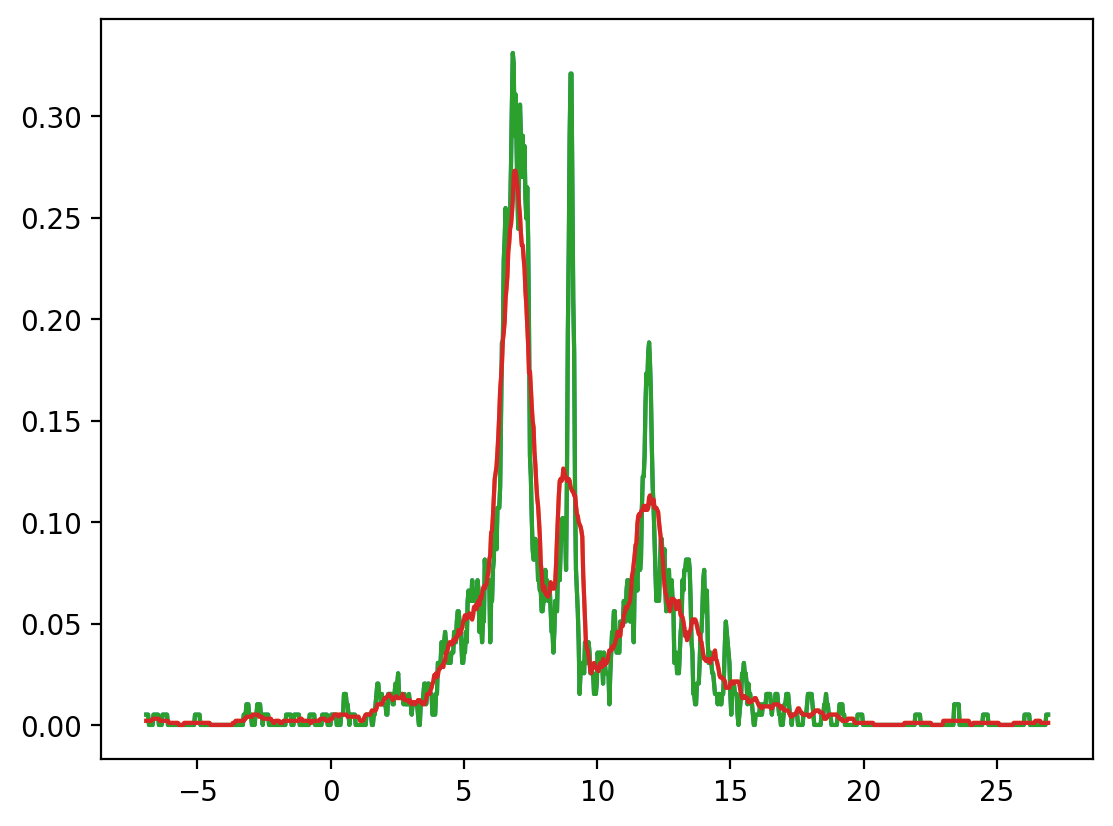

In [39]:
PDFtophat = kde_sklearn(x,bandwidth=0.1,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat); #Complete

PDFtophat = kde_sklearn(x,bandwidth=0.5,kernel="tophat") #Complete
plt.plot(xgrid,PDFtophat); #Complete
plt.show()

Now let's see what we get with the Gaussian `kernel="gaussian"` and Epanechnikov `kernel="epanechnikov"` kernels. Let's play with the bandwidths until we get something that looks reasonable (and roughly matches) for the two kernels.  They need not be the same.

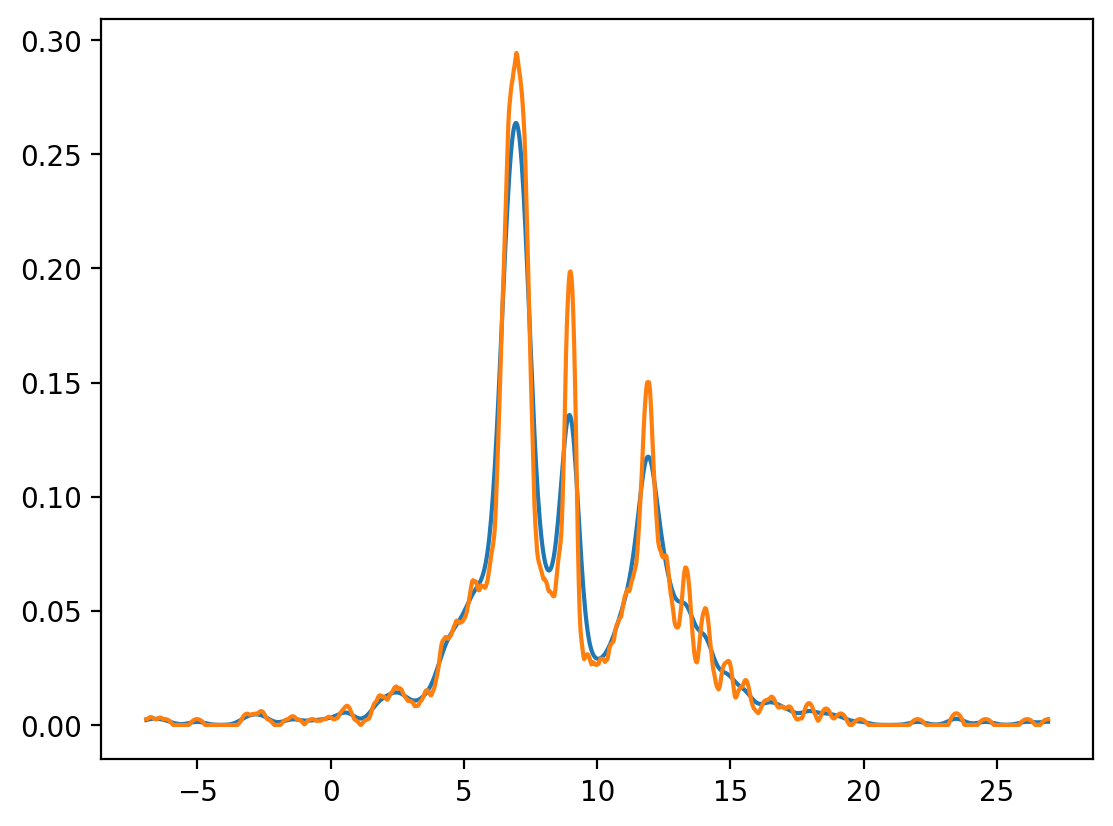

In [40]:
PDFtophat = kde_sklearn(x,bandwidth=0.3,kernel="gaussian") #Complete
plt.plot(xgrid,PDFtophat) #Complete

PDFtophat = kde_sklearn(x,bandwidth=0.3,kernel="epanechnikov") #Complete
plt.plot(xgrid,PDFtophat) #Complete
plt.show()

That's nice (and still pretty different from the histogram that we started out with). We'll see later on how to select the optimal bandwidth using cross validation. 

**HISTOGRAMS TAKE-AWAY MESSAGE:** 

Making a histogram is the first-cut we make of data, and it's certainly one of the most sensible things to try to get a feel for the data. But we can't just do it without thinking. We need to explore bin sizes and KDE smoothing bandwidths to tease out the structure in the distributions, and overcome any finite sample effects in bins by potentially having variable bin widths.

Finally, the normalized bin height of a histogram can simply be understood as

$$ f_k = \frac{n_k}{\Delta_b N}$$

where $k$ indexes the bin, $n_k$ is the occupancy number of the bin, $\Delta_b$ is the bin width, and $N$ is the total sample size. If we want to assign **uncertainties** to each bin height (not often done, but its good practice) then we can quote

$$ \sigma_k = \frac{\sqrt{n_k}}{\Delta_b N}$$

(this relies on approximating assuming that binning is a counting experiment, which is Poisson-distributed).

>## Assignment: The irreducible mass of black holes.

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

A rotating black-hole has a region called ergosphere such that in falling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carrying some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turn is the foundation of black-hole thermodynamics).


For a BH of mass $M$, and spin $\chi\in [0,1]$, the irreducible mass is 
$$
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
%\label{mirrdef}
$$
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurements of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what can be measured with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try a histogram with the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if $\sigma\gg \mu$.


7. (At home...) Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check if they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. 
\end{equation}
